In [407]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mode
from sklearn.cross_validation import train_test_split
sns.set(style="white", color_codes=True)

In [408]:
train=pd.read_csv('train_data.csv')
test=pd.read_csv('test_data.csv')
train=pd.DataFrame(train)
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [409]:
len(train.index)

614

In [410]:
train.groupby('Gender').size()

Gender
Female    112
Male      489
dtype: int64

In [411]:
train.groupby('Married').size()

Married
No     213
Yes    398
dtype: int64

In [412]:
train.groupby('Dependents').size()

Dependents
0     345
1     102
2     101
3+     51
dtype: int64

In [413]:
train.groupby('Education').size()

Education
Graduate        480
Not Graduate    134
dtype: int64

In [414]:
train.groupby('Self_Employed').size()

Self_Employed
No     500
Yes     82
dtype: int64

In [415]:
train.groupby('Credit_History').size()

Credit_History
0.0     89
1.0    475
dtype: int64

In [416]:
train.groupby('Property_Area').size()

Property_Area
Rural        179
Semiurban    233
Urban        202
dtype: int64

In [417]:
train.ApplicantIncome.describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [418]:
train.ApplicantIncome.median()

3812.5

In [419]:
train.ApplicantIncome.std()

6109.041673387174

In [420]:
train.ApplicantIncome.var()

37320390.167181164

In [421]:
train.CoapplicantIncome.describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

In [422]:
train.CoapplicantIncome.median()

1188.5

In [423]:
train.CoapplicantIncome.std()

2926.2483692241917

In [424]:
train.CoapplicantIncome.var()

8562929.518387241

In [425]:
train.LoanAmount.describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%             NaN
50%             NaN
75%             NaN
max      700.000000
Name: LoanAmount, dtype: float64

In [426]:
train.LoanAmount.median()

128.0

In [427]:
train.LoanAmount.std()

85.58732523570545

In [428]:
train.LoanAmount.var()

7325.190241002424

In [429]:
train.Loan_Amount_Term.describe()

count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%            NaN
50%            NaN
75%            NaN
max      480.00000
Name: Loan_Amount_Term, dtype: float64

In [430]:
train.Loan_Amount_Term.std()

65.12040985461256

In [431]:
train.Loan_Amount_Term.var()

4240.667779632721

In [432]:
train.groupby('Gender').Loan_Status.value_counts().unstack()

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


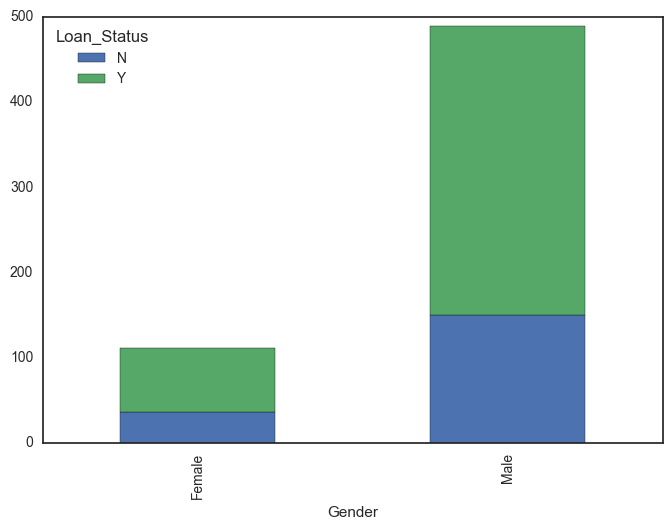

In [433]:
df=train.groupby('Gender').Loan_Status.value_counts().unstack()
df.plot(kind='bar', stacked=True)
plt.show()

In [434]:
train.groupby('Married').Loan_Status.value_counts().unstack()

Loan_Status,N,Y
Married,,
No,79,134
Yes,113,285


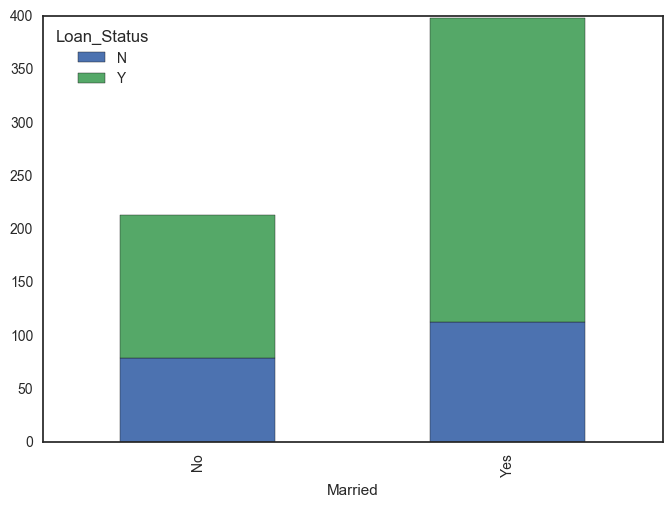

In [435]:
df=train.groupby('Married').Loan_Status.value_counts().unstack()
df.plot(kind='bar', stacked=True)
plt.show()

In [436]:
train.groupby('Dependents').Loan_Status.value_counts().unstack()

Loan_Status,N,Y
Dependents,,
0,107,238
1,36,66
2,25,76
3+,18,33


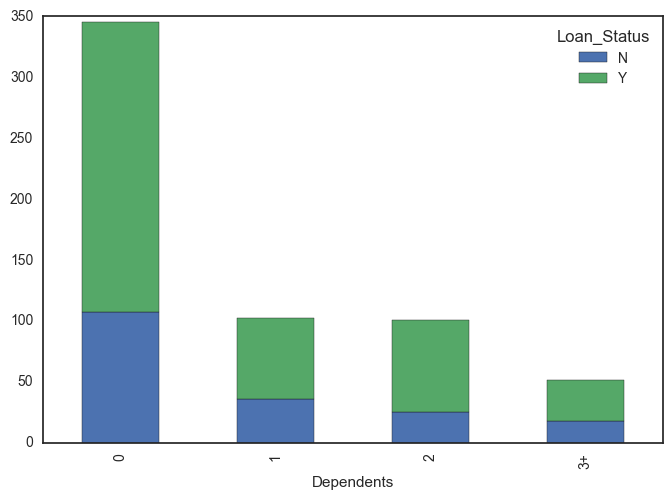

In [437]:
df=train.groupby('Dependents').Loan_Status.value_counts().unstack()
df.plot(kind='bar', stacked=True)
plt.show()

In [438]:
train.groupby('Education').Loan_Status.value_counts().unstack()

Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


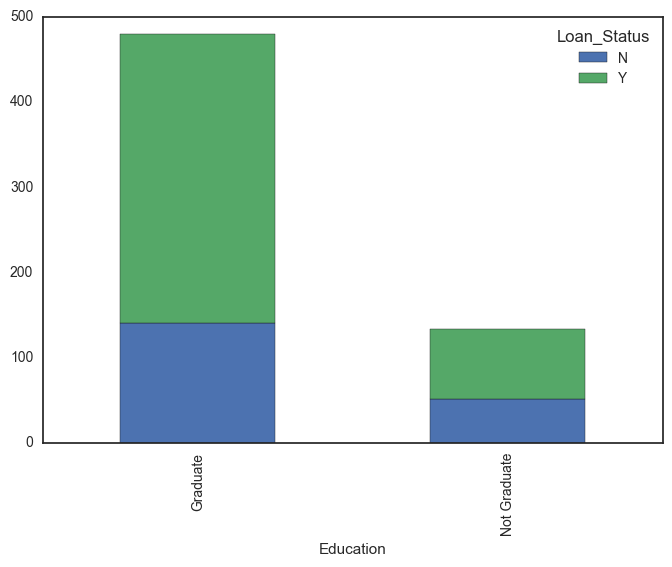

In [439]:
df=train.groupby('Education').Loan_Status.value_counts().unstack()
df.plot(kind='bar', stacked=True)
plt.show()

In [440]:
train.groupby('Self_Employed').Loan_Status.value_counts().unstack()

Loan_Status,N,Y
Self_Employed,,
No,157,343
Yes,26,56


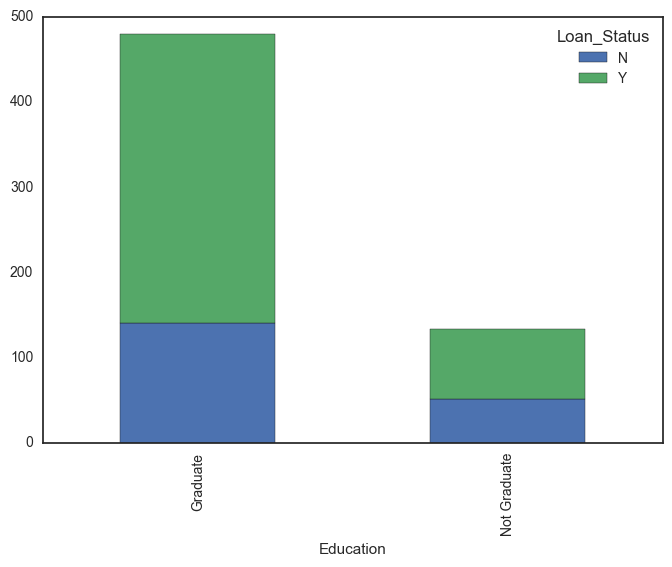

In [441]:
df=train.groupby(train.Education).Loan_Status.value_counts().unstack()
df.plot(kind='bar', stacked=True)
plt.show()

In [442]:
train.groupby(train.Credit_History).Loan_Status.value_counts().unstack()

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


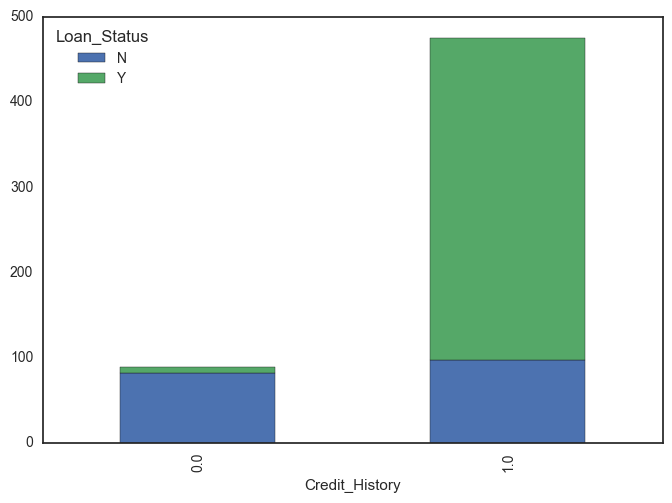

In [443]:
df=train.groupby(train.Credit_History).Loan_Status.value_counts().unstack()
df.plot(kind='bar', stacked=True)
plt.show()

In [444]:
train.groupby(train.Property_Area).Loan_Status.value_counts().unstack()

Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


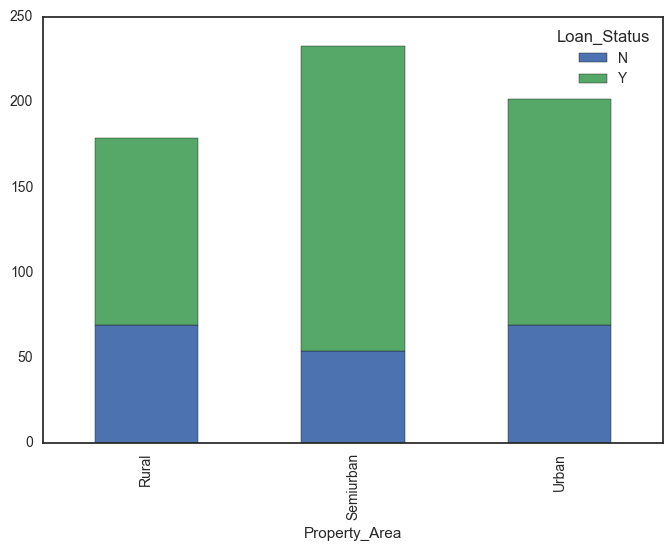

In [445]:
df=train.groupby(train.Property_Area).Loan_Status.value_counts().unstack()
df.plot(kind='bar', stacked=True)
plt.show()

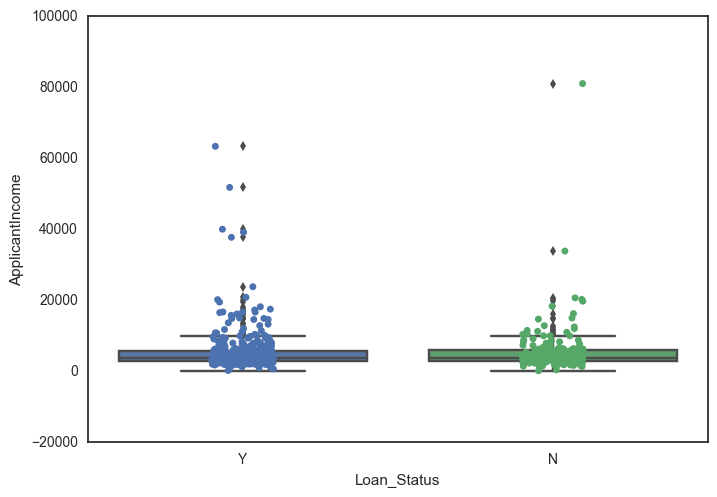

In [446]:
ax=sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=train)
sns.stripplot(x="Loan_Status", y="ApplicantIncome", data=train, jitter=True, edgecolor="gray")
plt.show()

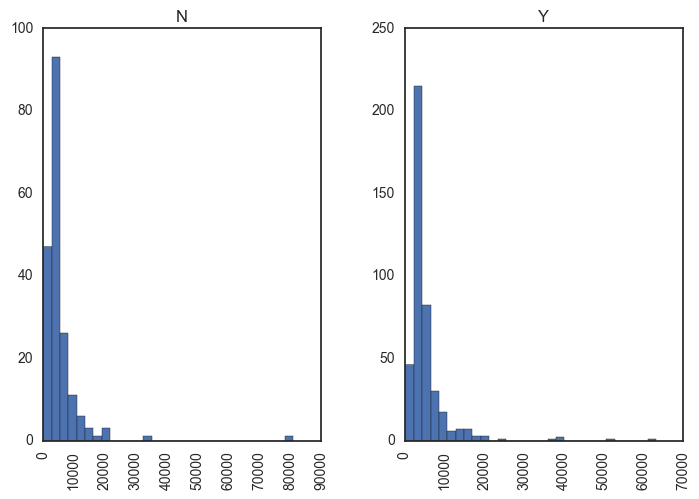

In [447]:
train.hist(column="ApplicantIncome",by="Loan_Status",bins=30)
plt.show()

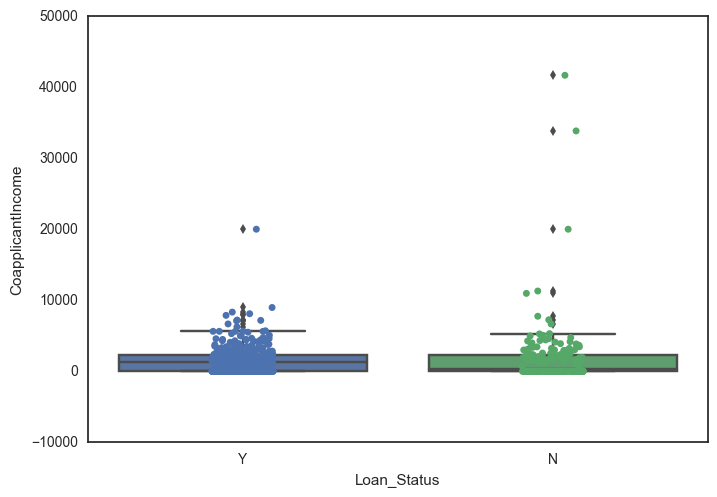

In [448]:
ax=sns.boxplot(x="Loan_Status", y="CoapplicantIncome", data=train)
sns.stripplot(x="Loan_Status", y="CoapplicantIncome", data=train, jitter=True, edgecolor="gray")
plt.show()

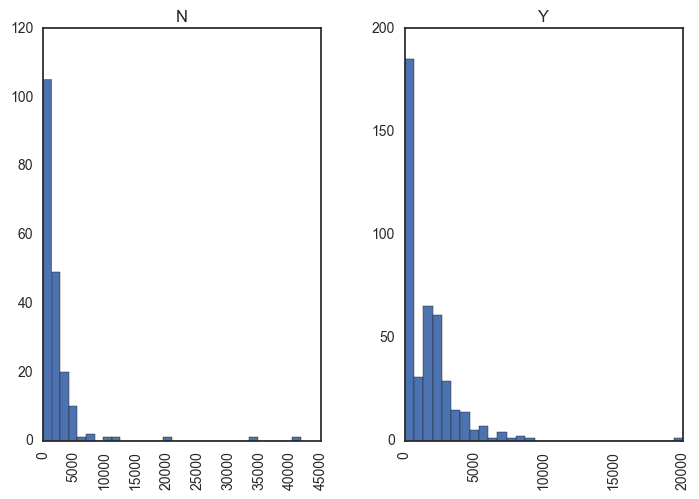

In [449]:
train.hist(column="CoapplicantIncome",by="Loan_Status",bins=30)
plt.show()

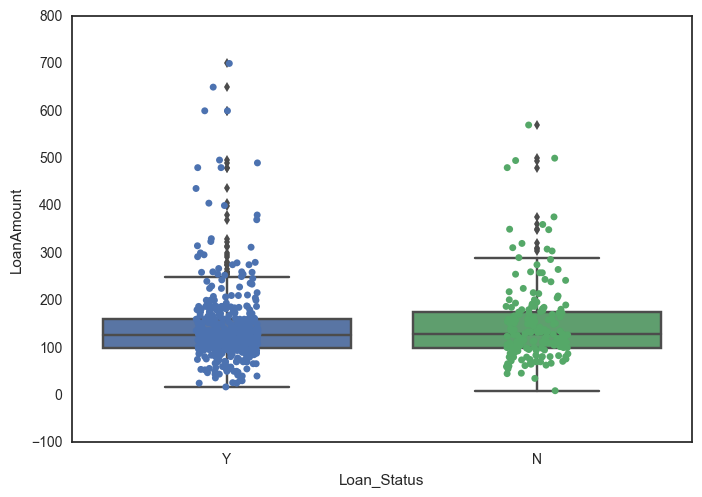

In [450]:
sns.boxplot(x="Loan_Status", y=train.LoanAmount, data=train)
sns.stripplot(x="Loan_Status", y=train.LoanAmount, data=train, jitter=True, edgecolor="gray")
plt.show()

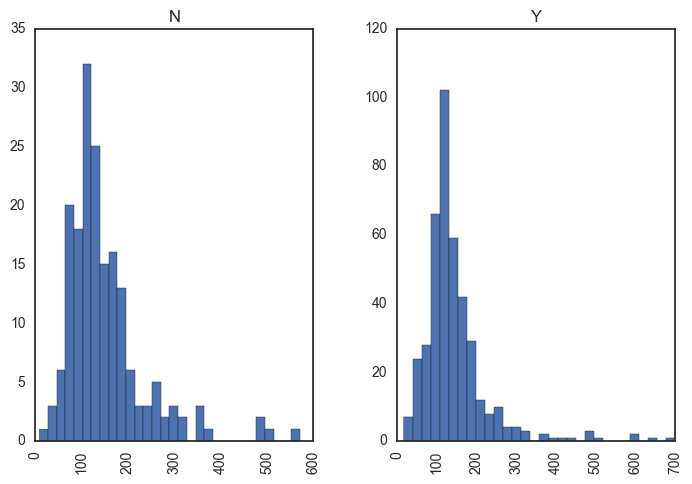

In [451]:
train.hist(column="LoanAmount",by="Loan_Status",bins=30)
plt.show()

In [452]:
def num_missing(x):
  return sum(x.isnull())

print("Missing values per column:")
print(train.apply(num_missing, axis=0))

Missing values per column:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [453]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)
test['Married'].fillna(test['Married'].mode()[0],inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace=True)

In [454]:
print("Missing values per column:")
print(train.apply(num_missing, axis=0))

Missing values per column:
Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64


In [455]:
medianLA=np.median(train.LoanAmount)
train.LoanAmount=train.LoanAmount.fillna(medianLA)
medianLA=np.median(train.Loan_Amount_Term)
train.Loan_Amount_Term=train.Loan_Amount_Term.fillna(medianLA)

medianLA=np.median(test.LoanAmount)
test.LoanAmount=test.LoanAmount.fillna(medianLA)
medianLA=np.median(test.Loan_Amount_Term)
test.Loan_Amount_Term=test.Loan_Amount_Term.fillna(medianLA)

In [456]:
print("Missing values per column:")
print(train.apply(num_missing, axis=0))

Missing values per column:
Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64


In [457]:
train.LoanAmount = train.LoanAmount.fillna(np.median(train[train.LoanAmount.notnull()].LoanAmount))
train.Loan_Amount_Term=train.Loan_Amount_Term.fillna(np.median(train[train.Loan_Amount_Term.notnull()].Loan_Amount_Term))

test.LoanAmount = test.LoanAmount.fillna(np.median(test[test.LoanAmount.notnull()].LoanAmount))
test.Loan_Amount_Term=test.Loan_Amount_Term.fillna(np.median(test[test.Loan_Amount_Term.notnull()].Loan_Amount_Term))

In [458]:
print("Missing values per column:")
print(train.apply(num_missing, axis=0))

Missing values per column:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [459]:
def outlier_detection(x):
    q75, q25 = np.percentile(x, [75 ,25])
    iqr = q75 - q25
    l=q25-1.5*iqr
    u=q75+1.5*iqr
    return l,u

In [460]:
l,u=outlier_detection(train.loc[(train["Loan_Status"]=='Y'), "ApplicantIncome"])
for i in range(0,len(train.loc[(train["Loan_Status"]=='Y'), "ApplicantIncome"])):
    ind=train.loc[(train["Loan_Status"]=='Y'), "ApplicantIncome"].index[i]
    if train.ApplicantIncome[ind]>u:
        train.ApplicantIncome[ind]=u
    elif train.ApplicantIncome[ind]<l:
        train.ApplicantIncome[ind]=l
        
l,u=outlier_detection(test.loc[(test["Loan_Status"]=='Y'), "ApplicantIncome"])
for i in range(0,len(test.loc[(test["Loan_Status"]=='Y'), "ApplicantIncome"])):
    ind=test.loc[(test["Loan_Status"]=='Y'), "ApplicantIncome"].index[i]
    if test.ApplicantIncome[ind]>u:
        test.ApplicantIncome[ind]=u
    elif test.ApplicantIncome[ind]<l:
        test.ApplicantIncome[ind]=l

KeyError: 'Loan_Status'

In [ ]:
l,u=outlier_detection(train.loc[(train["Loan_Status"]=='N'), "ApplicantIncome"])
for i in range(0,len(train.loc[(train["Loan_Status"]=='N'), "ApplicantIncome"])):
    ind=train.loc[(train["Loan_Status"]=='N'), "ApplicantIncome"].index[i]
    if train.ApplicantIncome[ind]>u:
        train.ApplicantIncome[ind]=u
    elif train.ApplicantIncome[ind]<l:
        train.ApplicantIncome[ind]=l

l,u=outlier_detection(test.loc[(test["Loan_Status"]=='N'), "ApplicantIncome"])
for i in range(0,len(test.loc[(test["Loan_Status"]=='N'), "ApplicantIncome"])):
    ind=test.loc[(test["Loan_Status"]=='N'), "ApplicantIncome"].index[i]
    if test.ApplicantIncome[ind]>u:
        test.ApplicantIncome[ind]=u
    elif test.ApplicantIncome[ind]<l:
        test.ApplicantIncome[ind]=l

In [ ]:
ax=sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=train)
sns.stripplot(x="Loan_Status", y="ApplicantIncome", data=train, jitter=True, edgecolor="gray")
plt.show()

In [ ]:
l,u=outlier_detection(train.loc[(train["Loan_Status"]=='Y'), "CoapplicantIncome"])
for i in range(0,len(train.loc[(train["Loan_Status"]=='Y'), "CoapplicantIncome"])):
    ind=train.loc[(train["Loan_Status"]=='Y'), "CoapplicantIncome"].index[i]
    if train.CoapplicantIncome[ind]>u:
        train.CoapplicantIncome[ind]=u
    elif train.CoapplicantIncome[ind]<l:
        train.CoapplicantIncome[ind]=l
        
l,u=outlier_detection(test.loc[(test["Loan_Status"]=='Y'), "CoapplicantIncome"])
for i in range(0,len(test.loc[(test["Loan_Status"]=='Y'), "CoapplicantIncome"])):
    ind=test.loc[(test["Loan_Status"]=='Y'), "CoapplicantIncome"].index[i]
    if test.CoapplicantIncome[ind]>u:
        test.CoapplicantIncome[ind]=u
    elif test.CoapplicantIncome[ind]<l:
        test.CoapplicantIncome[ind]=l

In [ ]:
l,u=outlier_detection(train.loc[(train["Loan_Status"]=='N'), "CoapplicantIncome"])
for i in range(0,len(train.loc[(train["Loan_Status"]=='N'), "CoapplicantIncome"])):
    ind=train.loc[(train["Loan_Status"]=='N'), "CoapplicantIncome"].index[i]
    if train.CoapplicantIncome[ind]>u:
        train.CoapplicantIncome[ind]=u
    elif train.CoapplicantIncome[ind]<l:
        train.CoapplicantIncome[ind]=l
        
l,u=outlier_detection(test.loc[(test["Loan_Status"]=='N'), "CoapplicantIncome"])
for i in range(0,len(test.loc[(test["Loan_Status"]=='N'), "CoapplicantIncome"])):
    ind=test.loc[(test["Loan_Status"]=='N'), "CoapplicantIncome"].index[i]
    if test.CoapplicantIncome[ind]>u:
        test.CoapplicantIncome[ind]=u
    elif test.CoapplicantIncome[ind]<l:
        test.CoapplicantIncome[ind]=l

In [ ]:
ax=sns.boxplot(x="Loan_Status", y="CoapplicantIncome", data=train)
sns.stripplot(x="Loan_Status", y="CoapplicantIncome", data=train, jitter=True, edgecolor="gray")
plt.show()

In [ ]:
l,u=outlier_detection(train.loc[(train["Loan_Status"]=='Y'), "LoanAmount"])
for i in range(0,len(train.loc[(train["Loan_Status"]=='Y'), "LoanAmount"])):
    ind=train.loc[(train["Loan_Status"]=='Y'), "LoanAmount"].index[i]
    if train.LoanAmount[ind]>u:
        train.LoanAmount[ind]=u
    elif train.LoanAmount[ind]<l:
        train.LoanAmount[ind]=l

In [ ]:
l,u=outlier_detection(train.loc[(train["Loan_Status"]=='N'), "LoanAmount"])
for i in range(0,len(train.loc[(train["Loan_Status"]=='N'), "LoanAmount"])):
    ind=train.loc[(train["Loan_Status"]=='N'), "LoanAmount"].index[i]
    if train.LoanAmount[ind]>u:
        train.LoanAmount[ind]=u
    elif train.LoanAmount[ind]<l:
        train.LoanAmount[ind]=l

In [ ]:
ax=sns.boxplot(x="Loan_Status", y="LoanAmount", data=train)
sns.stripplot(x="Loan_Status", y="LoanAmount", data=train, jitter=True, edgecolor="gray")
plt.show()

In [ ]:
train.loc[train['Gender']=='Male','Gender']=1
train.loc[train['Gender']=='Female','Gender']=0

test.loc[test['Gender']=='Male','Gender']=1
test.loc[test['Gender']=='Female','Gender']=0

train.loc[train['Married']=='Yes','Married']=1
train.loc[train['Married']=='No','Married']=0

test.loc[test['Married']=='Yes','Married']=1
test.loc[test['Married']=='No','Married']=0

train.loc[train['Education']=='Graduate','Education']=1
train.loc[train['Education']=='Not Graduate','Education']=0

test.loc[test['Education']=='Graduate','Education']=1
test.loc[test['Education']=='Not Graduate','Education']=0

train.loc[train['Self_Employed']=='Yes','Self_Employed']=1
train.loc[train['Self_Employed']=='No','Self_Employed']=0

test.loc[test['Self_Employed']=='Yes','Self_Employed']=1
test.loc[test['Self_Employed']=='No','Self_Employed']=0

train.loc[train['Loan_Status']=='Y','Loan_Status']=1
train.loc[train['Loan_Status']=='N','Loan_Status']=0

test.loc[train['Loan_Status']=='Y','Loan_Status']=1
test.loc[train['Loan_Status']=='N','Loan_Status']=0

train.loc[train['Dependents']=='3+','Dependents']=5
test.loc[test['Dependents']=='3+','Dependents']=5

arr=train.groupby('Property_Area').Loan_Status.value_counts()

train.loc[train['Property_Area']=='Semiurban','Property_Area']=arr[2]/(arr[2]+arr[3])
train.loc[train['Property_Area']=='Urban','Property_Area']=arr[4]/(arr[4]+arr[5])
train.loc[train['Property_Area']=='Rural','Property_Area']=arr[0]/(arr[0]+arr[1])

test.loc[test['Property_Area']=='Semiurban','Property_Area']=arr[2]/(arr[2]+arr[3])
test.loc[test['Property_Area']=='Urban','Property_Area']=arr[4]/(arr[4]+arr[5])
test.loc[test['Property_Area']=='Rural','Property_Area']=arr[0]/(arr[0]+arr[1])

In [ ]:
train.head()